### The plan is to do all the K-means coding in here

In [1]:
import pandas as pd

Massachusetts_starting_df = pd.read_csv('Massachusetts_all_outages_2020_2023.csv')

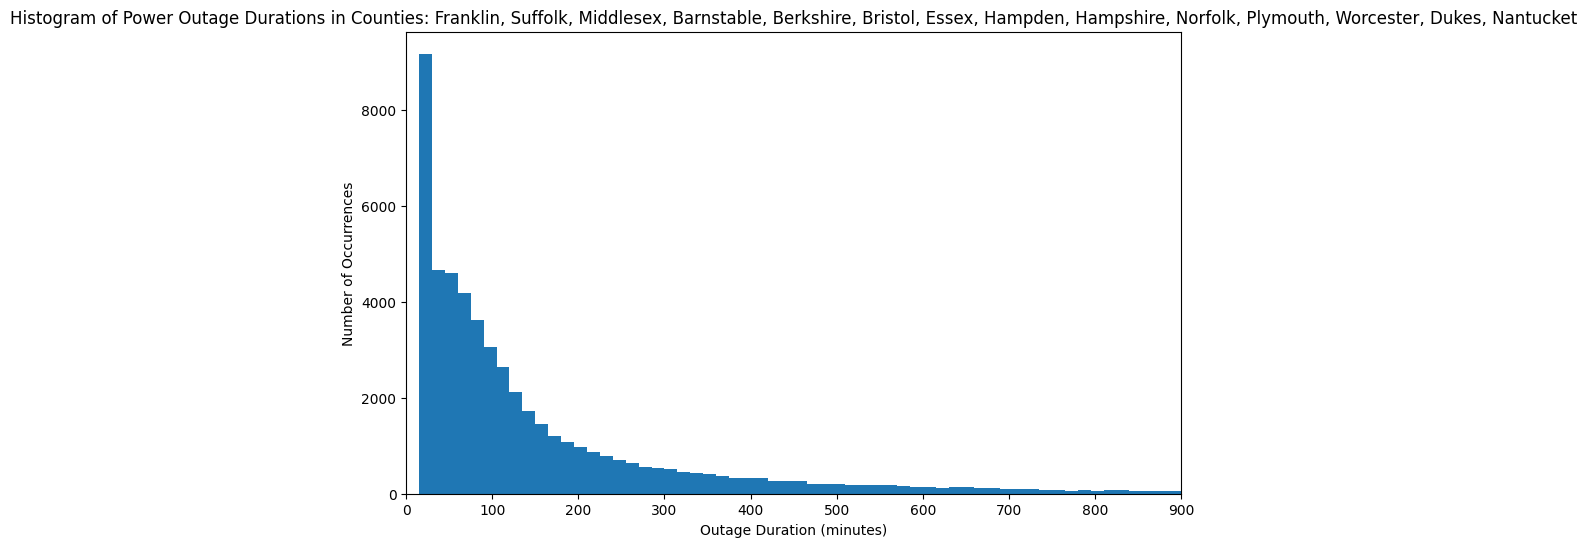

In [3]:
# Plot the histogram just to check!
import matplotlib.pyplot as plt
county_names = ["Franklin","Suffolk", "Middlesex", "Barnstable", "Berkshire", "Bristol", "Essex", "Hampden", "Hampshire", "Norfolk", "Plymouth", "Worcester", "Dukes", "Nantucket"] 


plt.figure(figsize=(10, 6)) 
plt.xlim(0, 900)
plt.hist(Massachusetts_starting_df['duration_minutes'], bins = list(range(0, 15000, 15)))  # Adjust 'bins' as needed
plt.xlabel('Outage Duration (minutes)')
plt.ylabel('Number of Occurrences')
plt.title(f'Histogram of Power Outage Durations in Counties: {", ".join(county_names)}')
plt.show()

## Regular K-means clustering

<Figure size 640x480 with 0 Axes>

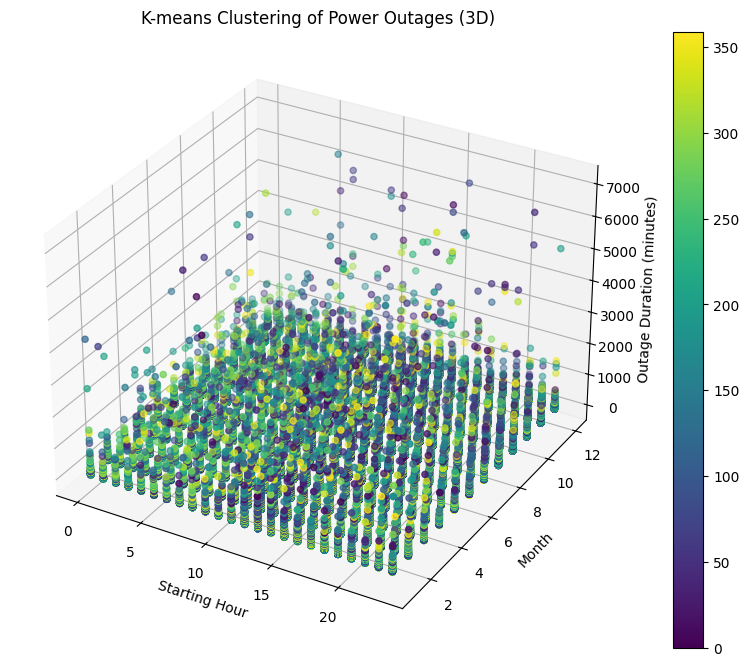

In [18]:
#3D clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


# Select the columns for clustering
clustering_columns = ['hour', 'duration_minutes', 'month']

# Create a new DataFrame with only the selected columns
X = Massachusetts_starting_df[clustering_columns]

# Choose the number of clusters (k)
k = 360

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster labels
Massachusetts_starting_df['cluster'] = kmeans.labels_

# 3D Visualization
fig = plt.figure()
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on cluster labels
scatter = ax.scatter(X['hour'], X['month'], X['duration_minutes'], c=Massachusetts_starting_df['cluster'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Starting Hour')
ax.set_ylabel('Month')
ax.set_zlabel('Outage Duration (minutes)')
ax.set_title('K-means Clustering of Power Outages (3D)')

# Add a colorbar
plt.colorbar(scatter)

# Show the plot
plt.show()

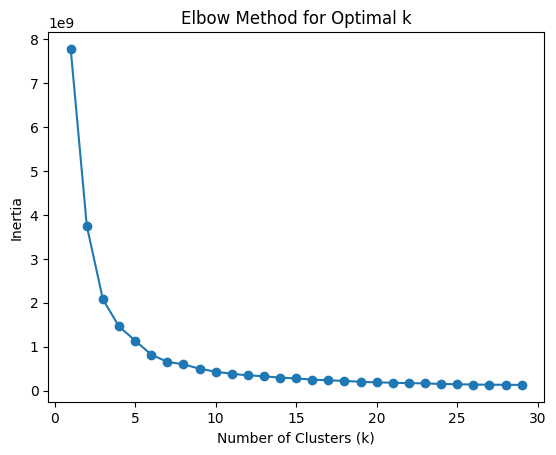

In [12]:
# Elbow Method to find optimal k
inertia = []
k_range = range(1, 30)  # Adjust the range as needed

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X)
    inertia.append(kmeans_test.inertia_)  # Inertia measures within-cluster sum of squares

# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [13]:
# Add cluster labels to the X DataFrame
X['cluster'] = kmeans.labels_

# Group by 'cluster' and calculate statistics, including 'month'
cluster_stats = X.groupby('cluster')[['hour', 'duration_minutes', 'month']].agg(['mean', 'median', 'count'])

# Calculate the total number of points
total_count = cluster_stats['hour']['count'].sum()

# Calculate the percentage for each cluster
cluster_stats['percentage'] = ((cluster_stats['hour']['count'] / total_count))

# Round the mean and median values to 2 decimal places
cluster_stats = cluster_stats

# Display the cluster statistics
print(cluster_stats)
cluster_stats['hour']['count'].min()

              hour              duration_minutes                    month  \
              mean median count             mean  median count       mean   
cluster                                                                     
0        14.429825   14.0   114            270.0   270.0   114  10.052632   
1        14.400000   14.0     5           2949.0  2940.0     5   5.200000   
2        11.397790   12.0   362             75.0    75.0   362   9.635359   
3        10.717949   10.0    39           1035.0  1035.0    39   6.358974   
4         8.666667    9.0     3           5465.0  5460.0     3   5.333333   
...            ...    ...   ...              ...     ...   ...        ...   
355       2.419355    2.0   217            105.0   105.0   217   3.451613   
356      12.533333   10.0    15           1599.0  1605.0    15   7.200000   
357      16.562500   15.5    16           1110.0  1110.0    16   7.062500   
358      13.000000   13.0     1           3855.0  3855.0     1   8.000000   

C:\Users\jonas\AppData\Local\Temp\ipykernel_25752\4005603516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


np.int64(1)

In [14]:
# Get the level name corresponding to 'mean'
mean_level_name = cluster_stats.columns.levels[1][1]  # Assuming 'mean' is the first level

# Round the mean values for 'hour', 'duration_minutes', and 'month' to the nearest integer
# Access the 'mean' level using `xs` with the dynamically identified level name
rounded_cluster_stats = cluster_stats[['hour', 'duration_minutes', 'month']].xs(mean_level_name, level=1, axis=1).round(0).reset_index()

# Copy the 'percentage' column from cluster_stats
rounded_cluster_stats['percentage'] = cluster_stats['percentage']

# Display the rounded_cluster_stats DataFrame
rounded_cluster_stats["duration_minutes"].max()

np.float64(7050.0)

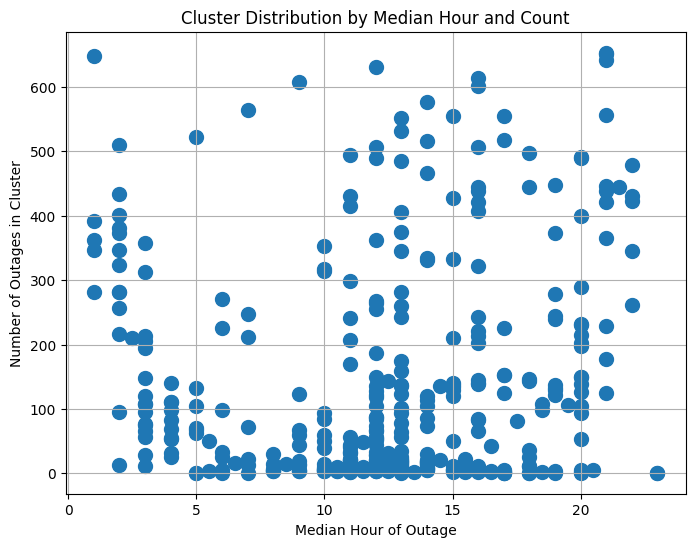

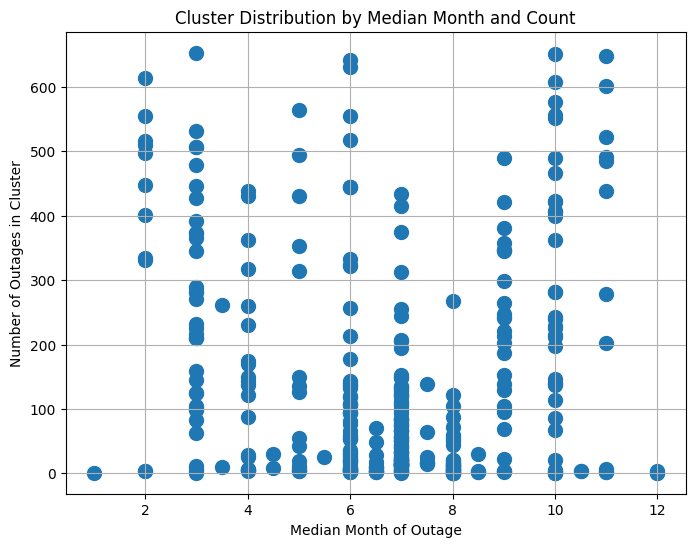

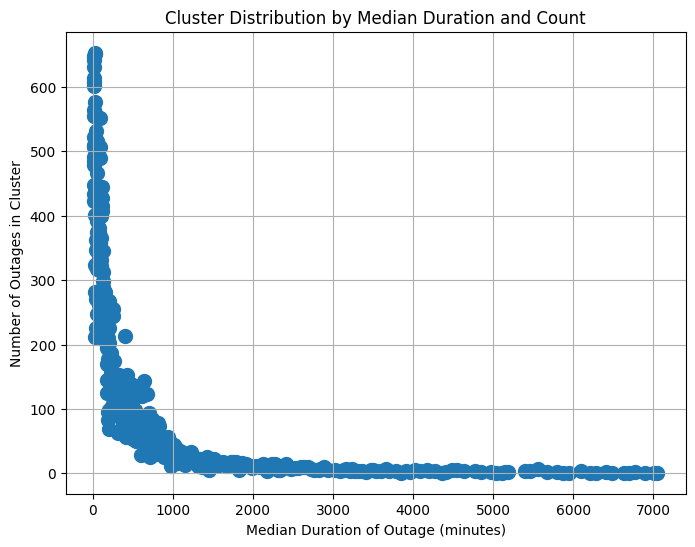

In [15]:
import matplotlib.pyplot as plt

# Assuming you have the 'cluster_stats' DataFrame available from your previous clustering

# 1. Scatter plot for Median Hour vs. Count
plt.figure(figsize=(8, 6))
plt.scatter(cluster_stats['hour']['median'], cluster_stats['hour']['count'], s=100)  # s controls marker size
plt.xlabel('Median Hour of Outage')
plt.ylabel('Number of Outages in Cluster')
plt.title('Cluster Distribution by Median Hour and Count')
plt.grid(True)
plt.show()

# 2. Scatter plot for Median Month vs. Count
plt.figure(figsize=(8, 6))
plt.scatter(cluster_stats['month']['median'], cluster_stats['month']['count'], s=100)
plt.xlabel('Median Month of Outage')
plt.ylabel('Number of Outages in Cluster')
plt.title('Cluster Distribution by Median Month and Count')
plt.grid(True)
plt.show()

# 3. Scatter plot for Median Duration vs. Count
plt.figure(figsize=(8, 6))
plt.scatter(cluster_stats['duration_minutes']['median'], cluster_stats['duration_minutes']['count'], s=100)
plt.xlabel('Median Duration of Outage (minutes)')
plt.ylabel('Number of Outages in Cluster')
plt.title('Cluster Distribution by Median Duration and Count')
plt.grid(True)
plt.show()

In [16]:
# Sort the cluster_stats DataFrame by the count of 'hour' in descending order
largest_clusters = cluster_stats.sort_values(('hour', 'count'), ascending=False)

# Select the top 10 rows (clusters)
top_10_clusters = largest_clusters.head(10)

# Display the top 10 clusters
print(top_10_clusters)

              hour              duration_minutes                   month  \
              mean median count             mean median count       mean   
cluster                                                                    
128      21.101072   21.0   653             30.0   30.0   653   3.347626   
177      20.602151   21.0   651             30.0   30.0   651   9.857143   
215       1.404321    1.0   648             15.0   15.0   648  10.603395   
331      20.746106   21.0   642             15.0   15.0   642   6.295950   
268      12.212361   12.0   631             15.0   15.0   631   6.362916   
295      15.648208   16.0   614             15.0   15.0   614   2.325733   
138       9.430921    9.0   608             15.0   15.0   608  10.014803   
327      16.434276   16.0   601             15.0   15.0   601  10.519135   
288      14.027730   14.0   577             30.0   30.0   577  10.332756   
207       6.721631    7.0   564             15.0   15.0   564   4.425532   

           

### Import the pre-modified dataframe

In [41]:
# Read CSV back into a DataFrame
electricity_demand_typical_hospital_ma = pd.read_csv('electricity_demand_typical_hospital_ma.csv')
electricity_demand_typical_hospital_ma['timestamp'] = pd.to_datetime(electricity_demand_typical_hospital_ma['timestamp'])
electricity_demand_typical_hospital_ma = electricity_demand_typical_hospital_ma.set_index('timestamp') 
electricity_demand_typical_hospital_ma.head()

,hospital_demand_ma
timestamp,
2018-01-01 00:15:00,581.864401
2018-01-01 00:30:00,582.220616
2018-01-01 00:45:00,567.352130
2018-01-01 01:00:00,582.508798
2018-01-01 01:15:00,583.235536


In [42]:
#First we find the worst period that could possible occur: Max demand +/- 240*15min to get the worst possible 5day

import pandas as pd

def find_max_and_context(df, column_name):
  """
  Finds the maximum value in a specified column of a pandas DataFrame
  and extracts the 10 rows before and after the row containing the 
  maximum value, considering a timestamp column as the index.

  Args:
    df: The pandas DataFrame with a timestamp index.
    column_name: The name of the column to search.
  """

  # Find the index of the maximum value
  max_index = df[column_name].idxmax()

  # Get a sorted list of all timestamps
  sorted_timestamps = sorted(df.index)

  # Find the position of the max_index in the sorted list
  max_position = sorted_timestamps.index(max_index)

  # Calculate start and end positions for the slice
  start_position = max(0, max_position - 239)
  end_position = min(len(df), max_position + 240)

  # Extract the timestamps for the slice
  selected_timestamps = sorted_timestamps[start_position:end_position]
  # Extract the corresponding rows from the DataFrame
  print(df.loc[selected_timestamps])

  # Extract the corresponding rows from the DataFrame
  return df.loc[selected_timestamps]  # Return the DataFrame slice



#Now you can use this corrected function to get the worst_case_data
worst_case_data = find_max_and_context(electricity_demand_typical_hospital_ma, 'hospital_demand_ma')


                     hospital_demand_ma
timestamp                              
2018-08-26 23:15:00          987.963225
2018-08-26 23:30:00          991.902525
2018-08-26 23:45:00          987.893851
2018-08-27 00:00:00          983.925867
2018-08-27 00:15:00          978.476026
...                                 ...
2018-08-31 21:45:00          774.476673
2018-08-31 22:00:00          767.881360
2018-08-31 22:15:00          770.341184
2018-08-31 22:30:00          762.949286
2018-08-31 22:45:00          759.690601

[479 rows x 1 columns]


In [43]:
# ... (your existing code)

# Divide the demand column by 1000
worst_case_data['hospital_demand_ma'] = worst_case_data['hospital_demand_ma'] / 1000

# Rename the column
worst_case_data = worst_case_data.rename(columns={'hospital_demand_ma': 'Demand_MW_z1'})

# Add a 'cluster' column with all values set to 0
worst_case_data['cluster'] = 0

# Pad or truncate the DataFrame to have exactly 480 rows
if len(worst_case_data) > 480:
    worst_case_data = worst_case_data.iloc[:480]  # Truncate if more than 480 rows
elif len(worst_case_data) < 480:
    # Create a DataFrame with zeros to pad
    padding_data = pd.DataFrame(0, index=range(480 - len(worst_case_data)), columns=worst_case_data.columns)
    
    # Concatenate the padding data to reach 480 rows
    worst_case_data = pd.concat([worst_case_data, padding_data])

# Print the modified DataFrame
print(worst_case_data)

                     Demand_MW_z1  cluster
2018-08-26 23:15:00      0.987963        0
2018-08-26 23:30:00      0.991903        0
2018-08-26 23:45:00      0.987894        0
2018-08-27 00:00:00      0.983926        0
2018-08-27 00:15:00      0.978476        0
...                           ...      ...
2018-08-31 22:00:00      0.767881        0
2018-08-31 22:15:00      0.770341        0
2018-08-31 22:30:00      0.762949        0
2018-08-31 22:45:00      0.759691        0
0                        0.000000        0

[480 rows x 2 columns]


In [44]:
# slicing the demand data
import random

# List to store sliced DataFrames
sliced_demand_data = []

# Iterate over each cluster in rounded_cluster_stats
for _, row in rounded_cluster_stats.iterrows():
    cluster = row['cluster']
    start_hour = int(row['hour'])
    duration_minutes = int(row['duration_minutes'])
    month = int(row['month'])

    # Filter demand data for the given month
    month_data = electricity_demand_typical_hospital_ma[electricity_demand_typical_hospital_ma.index.month == month]

    # Get all days in the month and randomly select one
    days_in_month = month_data.index.day.unique()
    random_day = random.choice(days_in_month)

    # Filter further for the specific day and hour
    start_time = pd.Timestamp(year=month_data.index[0].year, month=month, day=random_day, hour=start_hour)
    end_time = start_time + pd.Timedelta(minutes=duration_minutes-15)
    sliced_data = month_data.loc[start_time:end_time].copy() 

    # Add 'cluster' column to identify the slice
    sliced_data['cluster'] = cluster

    # Append to the list
    sliced_demand_data.append(sliced_data)

# Concatenate all sliced DataFrames into one
final_demand_data = pd.concat(sliced_demand_data)

# Display the final DataFrame
print(final_demand_data)

                     hospital_demand_ma  cluster
timestamp                                       
2018-10-07 14:00:00         1187.757103      0.0
2018-10-07 14:15:00         1166.094561      0.0
2018-10-07 14:30:00         1121.519521      0.0
2018-10-07 14:45:00         1076.697384      0.0
2018-10-07 15:00:00         1052.165973      0.0
...                                 ...      ...
2018-08-11 05:00:00         1149.226645    358.0
2018-11-30 19:00:00          578.517811    359.0
2018-11-30 19:15:00          579.366863    359.0
2018-11-30 19:30:00          572.397800    359.0
2018-11-30 19:45:00          575.703965    359.0

[29446 rows x 2 columns]


In [45]:
import random

# List to store sliced DataFrames
sliced_demand_data = []

# Total desired rows in the final DataFrame
total_rows = len(rounded_cluster_stats) * 480

# Iterate over each cluster in rounded_cluster_stats
for _, row in rounded_cluster_stats.iterrows():
    cluster = row['cluster']
    start_hour = int(row['hour'])
    duration_minutes = int(row['duration_minutes'])
    month = int(row['month'])

    # Filter demand data for the given month
    month_data = electricity_demand_typical_hospital_ma[electricity_demand_typical_hospital_ma.index.month == month]

    # Get all days in the month and randomly select one
    days_in_month = month_data.index.day.unique()
    random_day = random.choice(days_in_month)

    # Filter further for the specific day and hour
    start_time = pd.Timestamp(year=month_data.index[0].year, month=month, day=random_day, hour=start_hour)
    end_time = start_time + pd.Timedelta(minutes=duration_minutes - 15)
    sliced_data = month_data.loc[start_time:end_time].copy()

    # Add 'cluster' column to identify the slice
    sliced_data['cluster'] = cluster

    # Pad with zeros to reach 480 rows for this cluster
    rows_to_add = 480 - len(sliced_data)
    if rows_to_add > 0:
        padding_data = pd.DataFrame(0, index=range(rows_to_add), columns=sliced_data.columns)
        sliced_data = pd.concat([sliced_data, padding_data])

    # Append to the list
    sliced_demand_data.append(sliced_data)

# Concatenate all sliced DataFrames into one
final_demand_data = pd.concat(sliced_demand_data)

# Ensure the final DataFrame has the exact desired number of rows
if len(final_demand_data) > total_rows:
    final_demand_data = final_demand_data.iloc[:total_rows]
elif len(final_demand_data) < total_rows:
    padding_data = pd.DataFrame(0, index=range(total_rows - len(final_demand_data)), columns=final_demand_data.columns)
    final_demand_data = pd.concat([final_demand_data, padding_data])

# Rename the column and divide values by 1000
final_demand_data.rename(columns={'hospital_demand_ma': 'Demand_MW_z1'}, inplace=True)
final_demand_data['Demand_MW_z1'] = final_demand_data['Demand_MW_z1'] / 1000

# Add 480 additional zeros at the end
additional_zeros = pd.DataFrame(0, index=range(480), columns=final_demand_data.columns)
final_demand_data = pd.concat([final_demand_data, additional_zeros])
final_demand_data = pd.concat([final_demand_data, worst_case_data])

# Display the final DataFrame
print(final_demand_data)

                     Demand_MW_z1  cluster
2018-10-08 14:00:00      1.090635      0.0
2018-10-08 14:15:00      1.072343      0.0
2018-10-08 14:30:00      1.012357      0.0
2018-10-08 14:45:00      0.933906      0.0
2018-10-08 15:00:00      0.903411      0.0
...                           ...      ...
2018-08-31 22:00:00      0.767881      0.0
2018-08-31 22:15:00      0.770341      0.0
2018-08-31 22:30:00      0.762949      0.0
2018-08-31 22:45:00      0.759691      0.0
0                        0.000000      0.0

[173760 rows x 2 columns]


In [49]:
rounded_cluster_stats['percentage'].min()
# Count how many times this minimum percentage occurs
count_min_percentage = (rounded_cluster_stats['percentage'] == 0).sum()

# Print the result
print(f"The minimum percentage value of 0 occurs {count_min_percentage} times.")

The minimum percentage value of 0 occurs 0 times.


In [50]:
import pandas as pd

# ... (your existing code for creating final_demand_data and rounded_cluster_stats) ...

# Create a separate DataFrame for the single-row columns (Adapt values as needed)
overall_outage_probability = 0.000634
worst_case_probability = 0.00437 #this is the probability of the worst case (given that there is an outage, thus this is the conditional probability)
summary_df = pd.DataFrame({
    'Voll': [10000000000],  # Replace with appropriate value
    'Demand_Segment': [1],  # Replace with appropriate value
    'Cost_of_Demand_Curtailment_per_MW': [1],  # Replace with appropriate value
    'Max_Demand_Curtailment': [1],  # Replace with appropriate value
    '$/MWh': [20000],  # Replace with appropriate value
    'Rep_Periods': [len(rounded_cluster_stats) + 2],  # Number of clusters + 2 because zero demand scenario and worst case scenario
    'Timesteps_per_Rep_Period': [480],  # Fixed value
})

# Create a DataFrame for Sub_Weights, multiplying each probability by 35040
# Add the new weight for the additional period
sub_weights = (rounded_cluster_stats['percentage'] * 480 * overall_outage_probability *(1-worst_case_probability)).tolist()
sub_weights.append((1-overall_outage_probability) * 480)
sub_weights.append((overall_outage_probability) * worst_case_probability * 480)
sub_weights_df = pd.DataFrame({'Sub_Weights': sub_weights})

# Prepare the final_demand_data for concatenation
# Reset the index to ensure proper alignment during concatenation
final_demand_data_reset = final_demand_data.reset_index(drop=True)

# Drop the 'cluster' column
final_demand_data_reset = final_demand_data_reset.drop(columns=['cluster'])

# Create the Time_Index column
total_rows = (len(rounded_cluster_stats) + 2) * 480 #there is the zero demand scenario and there is the worst case scenario
time_index_df = pd.DataFrame({'Time_Index': range(1, total_rows + 1)})

# Concatenate all DataFrames horizontally, including the new Time_Index column
final_df = pd.concat([summary_df, sub_weights_df, time_index_df, final_demand_data_reset], axis=1)

# Save to Excel
final_df.to_csv('final_demand_data.csv', index=False)

print("Demand profile generated and saved to 'final_demand_data.csv'")

Demand profile generated and saved to 'final_demand_data.csv'
